<a href="https://colab.research.google.com/github/shazzad-hasan/github_demo/blob/main/bn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/Questions

/content/drive/My Drive/Colab Notebooks/Questions


In [3]:
!ls

corpus.train.bn  corpus.train.en


In [4]:
file = open('corpus.train.bn', encoding = 'utf8').read()

In [5]:
!pip install bnlp_toolkit

     |████████████████████████████████| 23.9 MB 4.3 MB/s 
     |████████████████████████████████| 1.2 MB 74.2 MB/s 
     |████████████████████████████████| 965 kB 69.0 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [6]:
!pip install bltk

     |████████████████████████████████| 17.4 MB 4.3 MB/s 
     |████████████████████████████████| 1.5 MB 59.8 MB/s 
     |████████████████████████████████| 749 kB 71.4 MB/s 
  Created wheel for bltk: filename=bltk-1.2-py3-none-any.whl size=17432539 sha256=c892f90c49a3280c2d389f98ecf45bf3670bf5fef53b17d5364a82ba7e939fcb
  Stored in directory: /root/.cache/pip/wheels/0b/4f/91/e074e661b4dcbc24a83e050d1c75cecfa186ffe9d58b641c51
Successfully built bltk
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [7]:
# Import required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from nltk.util import ngrams

import bnlp
from bnlp import NLTKTokenizer

%matplotlib inline

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [8]:
import re

# preprocess dataset 

file_nl_removed = ""

for line in file:
  # remove new lines
  line_nl_removed = line.replace("\n", " ")     
  file_nl_removed += line_nl_removed
  
from bltk.langtools.banglachars import (vowels,
                                        vowel_signs,
                                        consonants,
                                        digits,
                                        operators,
                                        punctuations,
                                        others)
# remove all special characters
file_p = "".join([char for char in file_nl_removed])

In [9]:
type(file_p)

str

In [10]:
file_p[:1000]

'আবার সবাইকে যার যার ইচ্ছামতো চলতে দিলে সমতা রক্ষা করা অসম্ভব হয়ে যায়। তুরুপ পদদলিত করা "সেগুলো হৃদয়কে উষ্ণ করে এবং রোজকার বোঝাগুলোকে হালকা করে। আমি ভালোবাসি তোমাকে । পোর্ট কোম্পানি লিমিটেড - কেপিসিএল তোলপাড় এছাড়াও ক্লেমঁসো উইলসনের ১৪ দফার ব্যাপারে সংশয়ী এবং হতাশ ছিলেন। তিনি অভিযোগ করে বলেন, "মিস্টার উইলসনের ১৪ দফা বিরক্তিকর। আল-জাজিরার সঙ্গে জালুদের সাক্ষাতকার এবং তার দৃষ্টিভঙ্গীর বিষয়ে অন্যান্য টুইটার ব্যবহারকারীরা মন্তব্য করেন: ক্লাব. তাই আসুন এখন আমরা একবার পরীক্ষা করে দেখি যে তাদের এই দাবি সত্যি কি না। ওমানের শাসক সুলতান কাবুস বিন সাইদের সমালোচনা করার অপরাধে আলরাওয়াহিকে শাস্তি প্রদানের পর গ্লোবাল ভয়েসেস এডভোকেসিতে ২০১২ সালে তাকে লক্ষ্যনীয়ভাবে উপস্থাপন করা হয়। আমাকে না বললেও আমি কাউকে বলতাম না। ভালুককে একটা আলিঙ্গন করে জড়িয়ে ধরে। " (১ পিতর ৫:৫) আমরা আমাদের ভাইদের সঙ্গে যেভাবে ব্যবহার করি তা যিহোবার সঙ্গে আমাদের সম্পর্কের ওপর একটা বড় ছাপ ফেলে।- ১ যোহন ৪:২০. দায়িত্ব. উনি ফল ছাড়া আর কিছুই খান না। আমার নাম এজাক্স! এর সদস্যদের মধ্যে একজন ছিলেন লন্ডনস্থ ইন্ডিয়া হাউসের বীরেন চট্টোপাধ্যায়.

In [11]:
file_p = "".join(i for i in file_p[:1000] if i in ["।"] or 2432 <= ord(i) <= 2559 or ord(i)== 32)


### Task 7: Data Statistics

In [12]:
bnltk = NLTKTokenizer()

sentences = bnltk.sentence_tokenize(file_p)
print("The number of sentences is", len(sentences)) 

words = bnltk.word_tokenize(file_p)
print("The number of tokens is", len(words)) 

average_tokens = round(len(words)/len(sentences))
print("The average number of tokens per sentence is", average_tokens) 

unique_tokens = set(words)
print("The number of unique tokens are", len(unique_tokens))

The number of sentences is 12
The number of tokens is 172
The average number of tokens per sentence is 14
The number of unique tokens are 140


### Task 1: N-gram Models (bigram, trigram)


In [13]:
from bnlp.corpus import stopwords, punctuations, letters, digits
from bnlp.corpus.util import remove_stopwords
from bltk.langtools import remove_stopwords


stop_words = remove_stopwords(sentences)

bigram=[]
trigram=[]

# create bigram and trigram models 
for sentence in sentences[:50]:
    sequence = bnltk.word_tokenize(sentence) 
    bigram.extend(list(ngrams(sequence, 2)))  
    trigram.extend(list(ngrams(sequence, 3)))

In [14]:
print(bigram[:5])

[('আবার', 'সবাইকে'), ('সবাইকে', 'যার'), ('যার', 'যার'), ('যার', 'ইচ্ছামতো'), ('ইচ্ছামতো', 'চলতে')]


In [15]:
print(trigram[:5])

[('আবার', 'সবাইকে', 'যার'), ('সবাইকে', 'যার', 'যার'), ('যার', 'যার', 'ইচ্ছামতো'), ('যার', 'ইচ্ছামতো', 'চলতে'), ('ইচ্ছামতো', 'চলতে', 'দিলে')]


### Task 3: Word frequencies using Zipf's law

In [16]:
import operator
from operator import itemgetter


# Calculate the frequency of the words inside
frequency = {}
for word in words[:50]:
    count = frequency.get(word , 0)
    frequency[ word ] = count + 1

rank = 1
column_header = ['Rank', 'Frequency', 'Frequency * Rank']
df = pd.DataFrame( columns = column_header )
collection = sorted(frequency.items(), key=itemgetter(1), reverse = True)

for word , freq in collection[:10]:
    df.loc[word] = [rank, freq, rank*freq]
    rank = rank + 1
    
df.head()

,Rank,Frequency,Frequency * Rank
।,1,4,4
করে,2,3,6
যার,3,2,6
করা,4,2,8
এবং,5,2,10


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2453 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2503 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2494 missing from current font.
  font.set_text(s

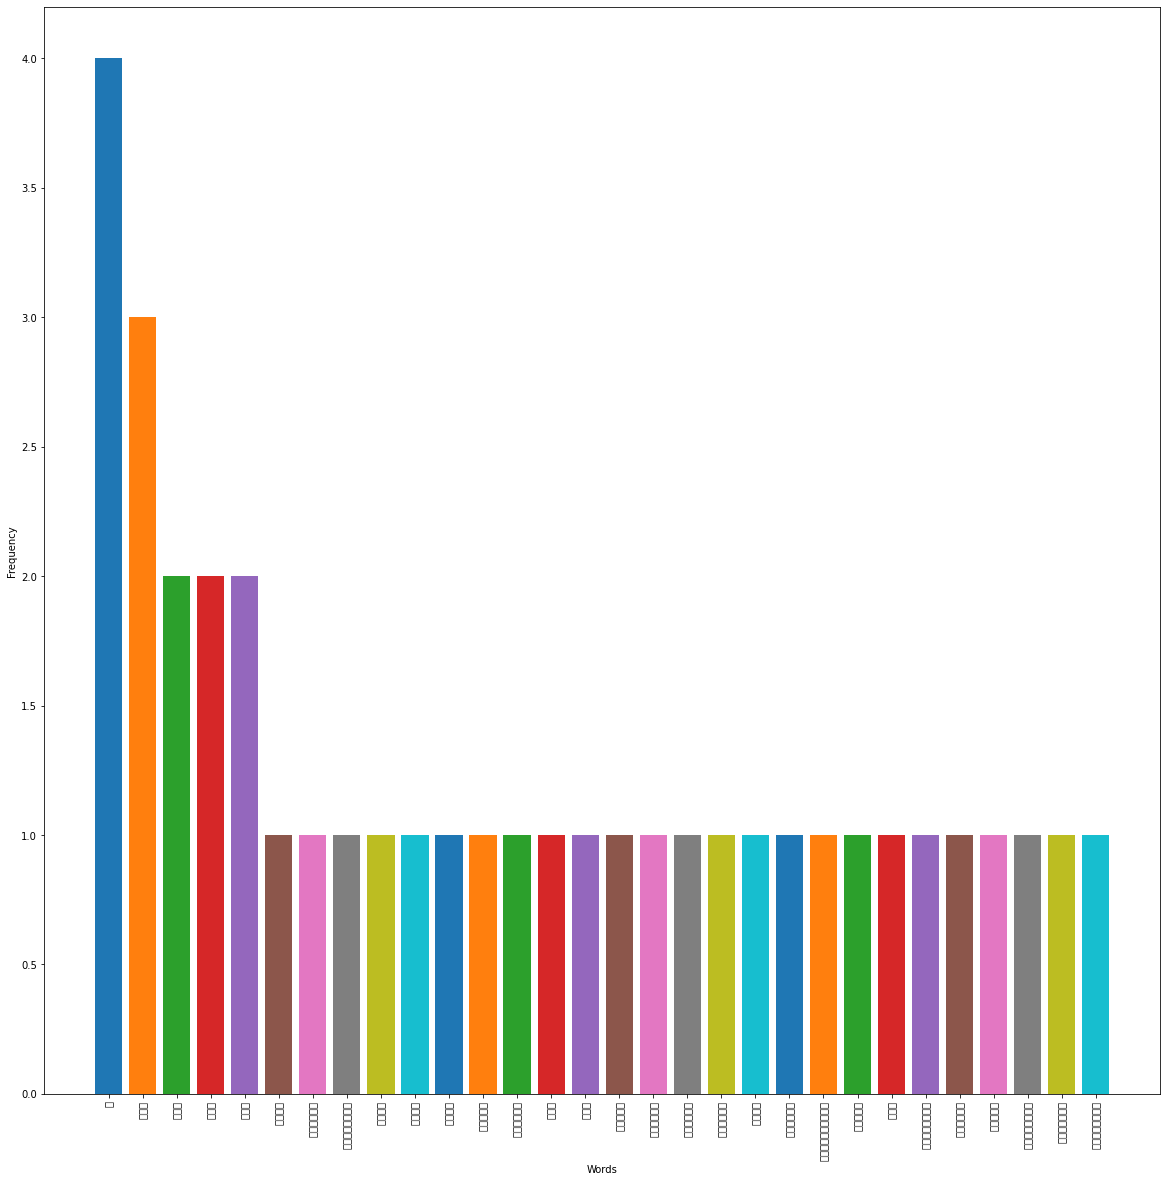

In [17]:
# Python visualization with pyplot
plt.figure(figsize=(20,20)) 
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=90)

for word , freq in collection[:30]:
    plt.bar(word, freq)    
plt.show()

### Task 4: Stemming and Lemmatisation

In [18]:
!pip install bangla-stemmer


In [29]:
from bangla_stemmer.stemmer import stemmer

stemmer = stemmer.BanglaStemmer()

# Stemming the words
# steming_words = [stemmer.stem(word) for word in words[:50] if not word in stopwords]

for word in words[:20]:
  if not word in stopwords:
    print(word+' -> '+ stemmer.stem(word))

applied first rules..
সবাইকে -> সবাইকে
applied first rules..
applied second rules..
ইচ্ছামতো -> ইচ্ছামতো
applied first rules..
চলতে -> চল
দিলে -> দিলে
সমতা -> সমতা
রক্ষা -> রক্ষা
অসম্ভব -> অসম্ভব
applied second rules..
হয়ে -> হয়
যায় -> যায়
। -> ।
তুরুপ -> তুরুপ
applied fourth rules..
পদদলিত -> পদদলিত
applied third rules..
সেগুলো -> সেই
applied first rules..
হৃদয়কে -> হৃদয়
উষ্ণ -> উষ্ণ


In [20]:
!pip install git+https://github.com/banglakit/lemmatizer.git#egg=banglakit-lemmatizer

  Cloning https://github.com/banglakit/lemmatizer.git to /tmp/pip-install-u3q1h6qd/banglakit-lemmatizer_2c2d9c254a8c475aaca6bcab8dfed7c3
  Running command git clone -q https://github.com/banglakit/lemmatizer.git /tmp/pip-install-u3q1h6qd/banglakit-lemmatizer_2c2d9c254a8c475aaca6bcab8dfed7c3
  Created wheel for banglakit-lemmatizer: filename=banglakit_lemmatizer-0.0.1-py3-none-any.whl size=117718 sha256=551f0fc0a67266e087ac3dc75c1859d28fce93ced382c425762d6b444cc264ca
  Stored in directory: /tmp/pip-ephem-wheel-cache-cca98w51/wheels/3f/67/0f/a2d1a5758cee58b4521b0f8a150c9f5dca02d0c2c229d58cd7
Successfully built banglakit-lemmatizer


In [32]:
from banglakit import lemmatizer as lem
from banglakit.lemmatizer import BengaliLemmatizer


lemmatizer = BengaliLemmatizer()

# Lemmatizing the words
lematizing_words = [lemmatizer.lemmatize(word) for word in words[:50] if not word in stopwords]

for word in words[:20]:
  if not word in stopwords:
    print(word+' -> '+ lemmatizer.lemmatize(word))

সবাইকে -> সবাইকে
ইচ্ছামতো -> ইচ্ছামতো
চলতে -> চলতে
দিলে -> দিলে
সমতা -> সমতা
রক্ষা -> রক্ষা
অসম্ভব -> অসম্ভব
হয়ে -> হয়ে
যায় -> যাওয়া
। -> ।
তুরুপ -> তুরুপ
পদদলিত -> পদদলিত
সেগুলো -> সেগুলো
হৃদয়কে -> হৃদয়কে
উষ্ণ -> উষ্ণ


### Task 5: Sentence repetition

In [34]:
duplicates = []
cleaned = []
for sentence in sentences[:20000]:
    if sentence in cleaned:
        if sentence in duplicates:
            continue
        else:
            duplicates.append(sentence)
    else:
        cleaned.append(sentence)

print(duplicates[:2])

[]


### Task 6: Tf-Idf measurements

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(use_idf=True,tokenizer=lambda x: x.split())

tf_idf =  vec.fit_transform(sentences[:5])
print(pd.DataFrame(tf_idf.toarray(), columns=vec.get_feature_names()))

     ।    অভিযোগ    অসম্ভব      আবার  আমি  ইচ্ছামতো   উইলসনের      উষ্ণ  \
0  0.0  0.000000  0.261257  0.261257  0.0  0.261257  0.000000  0.000000   
1  0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.302161   
2  0.5  0.000000  0.000000  0.000000  0.5  0.000000  0.000000  0.000000   
3  0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.215989  0.000000   
4  0.0  0.354602  0.000000  0.000000  0.0  0.000000  0.286091  0.000000   

     এছাড়াও       এবং  ...   লিমিটেড     সংশয়ী    সবাইকে      সমতা    সেগুলো  \
0  0.000000  0.000000  ...  0.000000  0.000000  0.261257  0.261257  0.000000   
1  0.000000  0.243782  ...  0.000000  0.000000  0.000000  0.000000  0.302161   
2  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.267713  0.215989  ...  0.267713  0.267713  0.000000  0.000000  0.000000   
4  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000  0.000000   

       হতাশ     হালকা    হৃদয়কে       হয়ে        ১৪  
0  0.000000  0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
